<a href="https://colab.research.google.com/github/amitabhswain/Detecting_Audio_Spoof_Attacks/blob/master/librosa_beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/GD')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


In [ ]:
!pip install librosa

In [ ]:
# Load imports
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [ ]:

ipd.Audio('/content/drive/My Drive/Bad_blood.mp3')

# Time domain representation


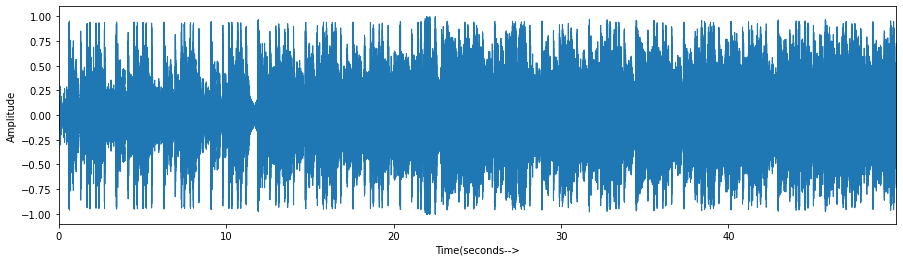

In [ ]:
filename = '/content/drive/My Drive/Bad_blood.mp3'
plt.figure(figsize=(15,4))
data,sample_rate = librosa.load(filename, sr=None, mono=True, offset=0.0, duration=50, res_type='kaiser_best')
librosa.display.waveplot(data,sr=sample_rate, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000)
plt.xlabel("Time(seconds-->")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
print(data)
print(data.shape)
print(len(data))
print(sample_rate)

[0.         0.         0.         ... 0.21461487 0.19741821 0.16767883]
(2205000,)
2205000
44100


In [ ]:
data

array([0.        , 0.        , 0.        , ..., 0.21461487, 0.19741821,
       0.16767883], dtype=float32)

In [ ]:
duration_of_sound=len(data)/sample_rate
print(duration_of_sound,"seconds")

50.0 seconds


# Frequency domain representation

In [ ]:
import scipy
def fft_plot(audio,sampling_rate):
  n=len(audio)
  T=1/sampling_rate
  yf=scipy.fft.fft(audio)
  xf=np.linspace(0.0,1.0/(2.0*T),n//2)
  fig,ax=plt.subplots()
  ax.plot(xf,2.0/n * np.abs(yf[:n//2]))
  plt.grid()
  plt.xlabel("Frequency-->")
  plt.ylabel("Magnitude")
  return plt.show()

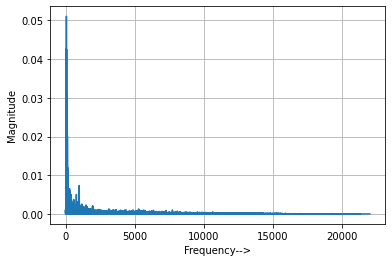

In [ ]:
fft_plot(data,sample_rate)

# Spectrogram

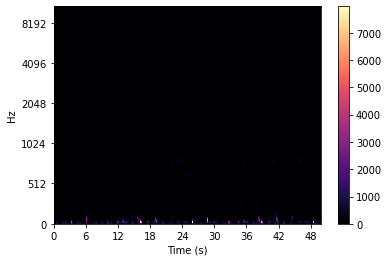

In [ ]:
spec = librosa.feature.melspectrogram(y=data, sr=sample_rate)
import librosa.display
librosa.display.specshow(spec,y_axis='mel', x_axis='s', sr=sample_rate)
plt.colorbar()

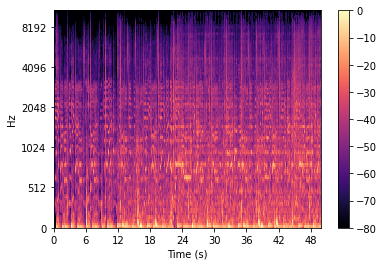

In [ ]:
import numpy as np
db_spec = librosa.power_to_db(spec, ref=np.max,)
librosa.display.specshow(db_spec,y_axis='mel', x_axis='s', sr=sample_rate)
plt.colorbar();

In [ ]:
print(librosa.beat.tempo(data, sr=sample_rate))

/usr/local/lib/python3.6/dist-packages/librosa/beat.py:306: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))


[112.34714674]
